In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
fraud = pd.read_csv('/Users/crivera/Desktop/capstone-dsir82/capstone_data/final_model.csv')

In [3]:
fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour
0,2019-01-01 00:26:22,3598215285024754,fraud_Heidenreich PLC,grocery_pos,207.36,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21 00:00:00,40.202538,-73.859212,0,0
1,2019-01-01 00:29:11,4789911625179723,"fraud_Mosciski, Gislason and Mertz",grocery_pos,221.81,F,Moriches,NY,11955,40.8095,-72.8229,3285,"Research officer, trade union",1988-04-27 00:00:00,40.011959,-72.594808,0,0
2,2019-01-01 00:31:01,30011465039817,fraud_Howe Ltd,misc_pos,54.02,F,Chatham,NY,12037,42.3496,-73.5873,4015,Human resources officer,1971-10-14 00:00:00,42.041783,-73.076424,0,0
3,2019-01-01 00:40:48,30404291151692,fraud_Kemmer-Buckridge,misc_pos,7.33,F,North Tonawanda,NY,14120,43.0498,-78.8510,45100,Ambulance person,1993-10-25 00:00:00,43.176300,-77.901777,0,0
4,2019-01-01 01:19:13,5104807169438134,fraud_Williamson LLC,misc_pos,47.85,F,Westhampton Beach,NY,11978,40.8295,-72.6473,3255,Financial trader,1978-07-08 00:00:00,40.712685,-72.124522,0,1


In [6]:
fraud = fraud[fraud['state']=='NY']

In [7]:
from sklearn.linear_model import LogisticRegression

# dummy for object variables
df_fraud = fraud.copy()
df_fraud = pd.get_dummies(fraud, columns=['gender','city','state','category','merchant'])

# dummy friends
X = df_fraud.drop(columns=['trans_date_trans_time','lat','long','job','merch_lat','merch_long','dob','is_fraud'])
y = df_fraud['is_fraud']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.7)

# standard scale
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# train model
logreg = LogisticRegression()
logreg.fit(X_train_ss,y_train)

# score model
logreg.score(X_train_ss,y_train)

/Users/crivera/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9953464499572284

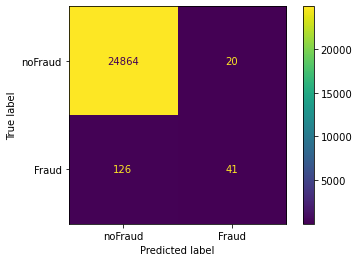

In [8]:
plot_confusion_matrix(logreg, X_test_ss, y_test, display_labels=['noFraud','Fraud'])
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier

# train model
dt = DecisionTreeClassifier()
dt.fit(X_train_ss,y_train)

# score model
dt.score(X_train_ss,y_train)

1.0

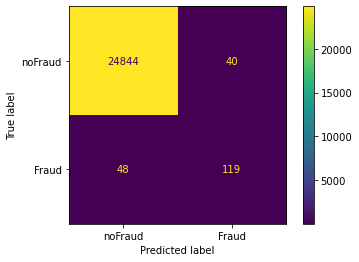

In [15]:
plot_confusion_matrix(dt, X_test_ss, y_test, display_labels=['noFraud','Fraud'])
plt.show()

## ```Modeling w/ Balanced Classes```
---
1. Create balanced classes using Smote
2. Compare Null model and final model based on type 2 errors

In [82]:
# NY only
fraud = fraud[fraud['state']=='NY']

# dummy for object variables
df_fraud = fraud.copy()
df_fraud = pd.get_dummies(fraud, columns=['gender','city','category','merchant'])

# dummy friends
X = df_fraud.drop(columns=['trans_date_trans_time','lat','long','job','merch_lat','merch_long','dob','is_fraud','state'])
y = df_fraud['is_fraud']

# Instantiate Smote Class
smo = SMOTE(random_state=42)

# Synthetically enhance minority class
X_smo, y_smo = smo.fit_resample(X,y)

# train/test
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,stratify=y_smo,train_size=0.7)

# standard scale
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# train model
dt = DecisionTreeClassifier()
dt.fit(X_train_ss,y_train)

# score model
dt.score(X_train_ss,y_train)

1.0

In [83]:
dt.score(X_test_ss,y_test)

0.991902427262498

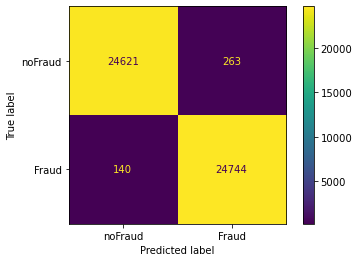

In [84]:
plot_confusion_matrix(dt, X_test_ss, y_test, display_labels=['noFraud','Fraud'])
plt.show()

In [88]:
# This model will be used for the app just for demo purposes on a specific 
with open('app_model/dt_ny.pkl', mode = 'wb') as pickle_out:
    pickle_out = pickle.dump(dt, pickle_out)

**The dt model showed perfect accuracy on the train set, with little difference on the testing set.**

In [98]:
X_train.shape

(116124, 781)

In [99]:
X_test.shape

(49768, 781)

In [113]:
X_train.columns

Index(['cc_num', 'amt', 'zip', 'city_pop', 'hour', 'gender_F', 'gender_M',
       'city_Albany', 'city_Allentown', 'city_Altona',
       ...
       'merchant_fraud_Yost, Schamberger and Windler',
       'merchant_fraud_Yost-Rogahn', 'merchant_fraud_Zboncak LLC',
       'merchant_fraud_Zboncak Ltd',
       'merchant_fraud_Zboncak, Rowe and Murazik',
       'merchant_fraud_Zemlak Group',
       'merchant_fraud_Zemlak, Tillman and Cremin',
       'merchant_fraud_Ziemann-Waters',
       'merchant_fraud_Zieme, Bode and Dooley', 'merchant_fraud_Zulauf LLC'],
      dtype='object', length=781)

In [102]:
X_train.columns[7:7+67]

Index(['city_Albany', 'city_Allentown', 'city_Altona', 'city_Armonk',
       'city_Barneveld', 'city_Beacon', 'city_Belfast', 'city_Bellmore',
       'city_Big Indian', 'city_Breesport', 'city_Bronx', 'city_Brooklyn',
       'city_Brownville', 'city_Camden', 'city_Chatham', 'city_Cottekill',
       'city_Cowlesville', 'city_De Lancey', 'city_Downsville',
       'city_East Rochester', 'city_Falconer', 'city_Farmington',
       'city_Garrattsville', 'city_Greenport', 'city_Hannawa Falls',
       'city_Howes Cave', 'city_Hudson', 'city_Irvington', 'city_Jefferson',
       'city_Jordanville', 'city_Knowlesville', 'city_Lowville',
       'city_Margaretville', 'city_Medford', 'city_Melville', 'city_Montrose',
       'city_Moriches', 'city_Mount Morris', 'city_Mount Vernon',
       'city_Nanuet', 'city_New York City', 'city_Newark Valley',
       'city_North Tonawanda', 'city_Northport', 'city_Oak Hill',
       'city_Oakdale', 'city_Orangeburg', 'city_Orient', 'city_Oriskany Falls',
       'c

In [114]:
print(fraud['merchant'].nunique())
print(fraud['city'].nunique())
print(fraud['category'].nunique())
print(fraud['gender'].nunique())

693
67
14
2


In [108]:
X_train.columns[1+7+67:1+7+67+14]

Index(['category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'merchant_fraud_Abbott-Rogahn'],
      dtype='object')

In [110]:
X_train.columns[781-693:781]

Index(['merchant_fraud_Abbott-Rogahn', 'merchant_fraud_Abbott-Steuber',
       'merchant_fraud_Abernathy and Sons', 'merchant_fraud_Abshire PLC',
       'merchant_fraud_Adams, Kovacek and Kuhlman',
       'merchant_fraud_Adams-Barrows',
       'merchant_fraud_Altenwerth, Cartwright and Koss',
       'merchant_fraud_Altenwerth-Kilback', 'merchant_fraud_Ankunding LLC',
       'merchant_fraud_Ankunding-Carroll',
       ...
       'merchant_fraud_Yost, Schamberger and Windler',
       'merchant_fraud_Yost-Rogahn', 'merchant_fraud_Zboncak LLC',
       'merchant_fraud_Zboncak Ltd',
       'merchant_fraud_Zboncak, Rowe and Murazik',
       'merchant_fraud_Zemlak Group',
       'merchant_fraud_Zemlak, Tillman and Cremin',
       'merchant_fraud_Ziemann-Waters',
       'merchant_fraud_Zieme, Bode and Dooley', 'merchant_fraud_Zulauf LLC'],
      dtype='object', length=693)

In [85]:
lr = LogisticRegression()
lr.fit(X_train_ss,y_train)
lr.score(X_train_ss,y_train)

0.9827942544176914

In [86]:
lr.score(X_test_ss,y_test)

0.9813735733804855

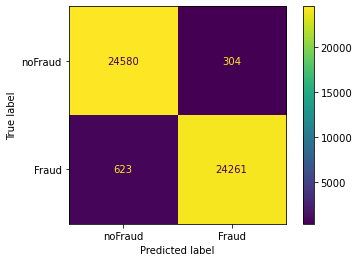

In [87]:
plot_confusion_matrix(lr, X_test_ss, y_test, display_labels=['noFraud','Fraud'])
plt.show()

**The lr model had 0.98 accuracy on both train and test sets. However, the type 2 errors increased significantly.**

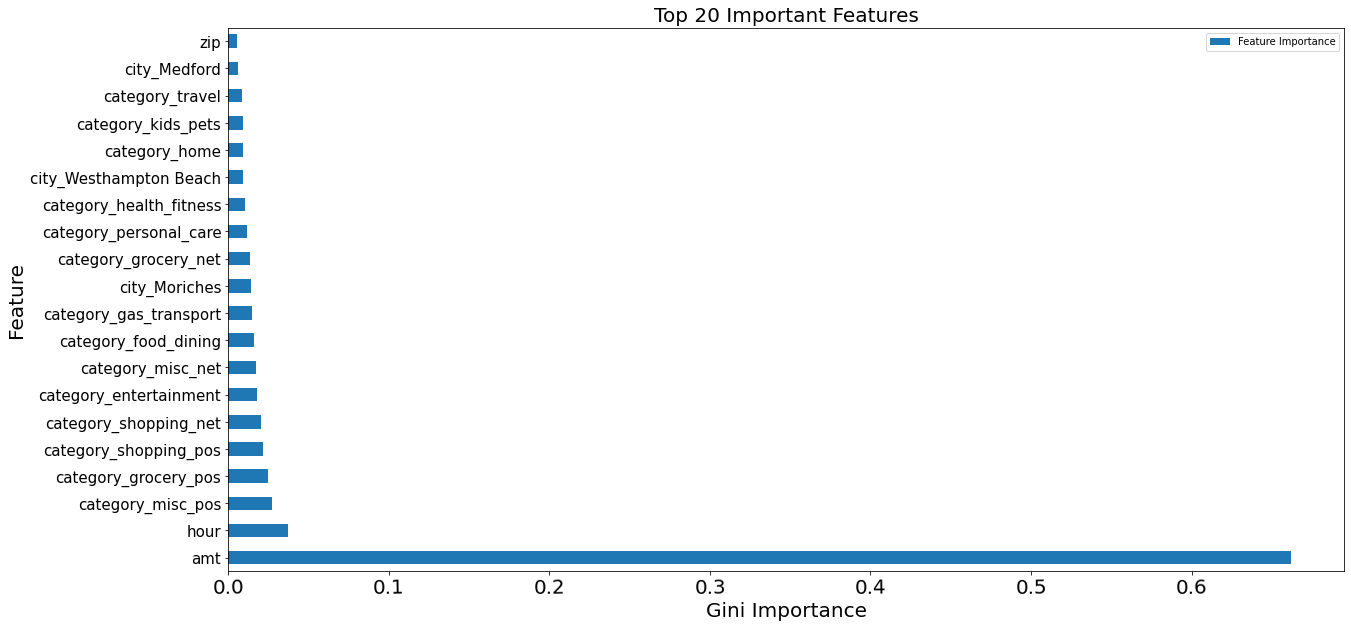

In [50]:
pd.DataFrame(dt.feature_importances_, X_train.columns, columns=['Feature Importance']).sort_values(by = 'Feature Importance', ascending=False).head(20).plot(kind='barh',figsize=(20,10))
plt.title('Top 20 Important Features', fontsize=20)
plt.xticks(rotation=1, fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('Feature',fontsize=20)
plt.xlabel('Gini Importance', fontsize=20);

**Purchase Amount was the most important "question" to ask before splitting the dataframe into smaller subsets.**

In [51]:
preds = np.round(dt.predict(X_test_ss),0)
misclass1 = []
for row_index, (input, prediction, label) in enumerate(zip (X_test_ss, preds, y_test)):
    if prediction != label:
        misclass1.append(row_index)
        print('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)

Row 101 has been classified as  1 and should be  0
Row 134 has been classified as  0 and should be  1
Row 138 has been classified as  1 and should be  0
Row 580 has been classified as  1 and should be  0
Row 622 has been classified as  1 and should be  0
Row 807 has been classified as  1 and should be  0
Row 878 has been classified as  1 and should be  0
Row 940 has been classified as  1 and should be  0
Row 983 has been classified as  0 and should be  1
Row 1034 has been classified as  1 and should be  0
Row 1062 has been classified as  0 and should be  1
Row 1310 has been classified as  0 and should be  1
Row 1575 has been classified as  1 and should be  0
Row 1593 has been classified as  1 and should be  0
Row 1802 has been classified as  1 and should be  0
Row 2216 has been classified as  1 and should be  0
Row 2223 has been classified as  1 and should be  0
Row 2243 has been classified as  0 and should be  1
Row 2309 has been classified as  1 and should be  0
Row 2363 has been cla

In [69]:
tar_misclass_set = [misclass1]        
tar_misclass_ids = {}

# Setting up dataframe of misclassified fraud cases
for misclass in tar_misclass_set:
    for ids in misclass:
        if ids in tar_misclass_ids.keys():
            tar_misclass_ids[ids] += 1
        else:
            tar_misclass_ids[ids] = 1

tar_misclass_df = fraud.iloc[[item for sublist in tar_misclass_set for item in sublist]]
tar_misclass_df['no_of_misclass'] = 0

for ids in tar_misclass_df.index:
    tar_misclass_df['no_of_misclass'].loc[ids] = tar_misclass_ids[ids]

# Saving df for EDA
print(tar_misclass_df.shape)
tar_misclass_df.to_csv('./dt_misclass.csv')
tar_misclass_df.head()

(267, 19)


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,no_of_misclass
101,2019-01-01 17:19:51,3514897282719543,fraud_Cormier LLC,health_fitness,24.75,M,Farmington,NY,14425,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13 00:00:00,42.641638,-76.902462,0,17,1
134,2019-01-01 21:12:01,3585052663373890,fraud_Bahringer Group,health_fitness,106.22,M,West Eaton,NY,13484,42.8546,-75.6605,176,Science writer,1963-12-28 00:00:00,43.331880,-76.482360,0,21,1
138,2019-01-01 21:23:29,180058696935600,fraud_Jerde-Hermann,travel,5.21,M,De Lancey,NY,13752,42.1890,-74.9229,782,Chartered accountant,2000-08-28 00:00:00,43.178184,-75.885184,0,21,1
580,2019-01-06 17:49:40,346208242862904,"fraud_McDermott, Osinski and Morar",home,21.65,F,New York City,NY,10280,40.7105,-74.0163,1577385,"Pharmacist, hospital",1961-05-13 00:00:00,41.314483,-73.757026,0,17,1
622,2019-01-06 23:31:03,5104807169438134,fraud_Hyatt-Blick,travel,5.12,F,Westhampton Beach,NY,11978,40.8295,-72.6473,3255,Financial trader,1978-07-08 00:00:00,41.528181,-73.182200,0,23,1


## ```NoteBook Conclusion```
---
1. My final model will be a decisiontree classifier with default settings. This model showed to have significantly less misclassifications than the null model(Logisitc Regression).
2. My App will run only on the data from NY, but can certainly be expanded to other states or all states. Based on my initial EDA, NY had the highest amount of fraud cases of all states. This my app is just a demo, i'll use only NY data. 
3. Misclassification dataframe will be used in the **-Misclassification EDA-** notebook to investigate any possible trends in the data.